In [1]:
import numpy as np
import theano
import theano.tensor as T
import lasagne

import matplotlib.pyplot as plt
%matplotlib inline

import pickle
import os
from sklearn.cross_validation import train_test_split

from prepare_images import prep_image
from cnn_creator import create_cnn
from trainer import train

Using gpu device 0: GeForce GT 640M (CNMeM is disabled, cuDNN not available)


In [2]:
X = []
y = []

for cls in xrange(10):
    for fn in os.listdir('./leedsbutterfly/classes/{}'.format(cls+1)):
        _, im = prep_image('./leedsbutterfly/classes/{}/{}'.format(cls+1, fn))
        X.append(im)
        y.append(cls)
        
X = np.concatenate(X)
y = np.array(y).astype('int32')
print X.shape
print y.shape

(832, 3, 224, 224)
(832,)


In [4]:
# Split data into training, testing and validation set
rng = np.random.RandomState(0)
permutation = rng.permutation(len(X))
X, y = X[permutation], y[permutation]
train_idxs, test_idxs = train_test_split(range(len(y)),  random_state=0)
train_idxs, val_idxs = train_test_split(range(len(train_idxs)),  random_state=0)

X_train = X[train_idxs]
y_train = y[train_idxs]

X_val = X[val_idxs]
y_val = y[val_idxs]

X_test = X[test_idxs]
y_test = y[test_idxs]

print X_train.shape, y_train.shape
print X_val.shape, y_val.shape
print X_test.shape, y_test.shape
# check training data contains examples from all classes in good number
print sum(y_train==0)
print sum(y_train==1)
print sum(y_train==2)
print sum(y_train==3)
print sum(y_train==4)
print sum(y_train==5)
print sum(y_train==6)
print sum(y_train==7)
print sum(y_train==8)
print sum(y_train==9)

(468, 3, 224, 224) (468,)
(156, 3, 224, 224) (156,)
(208, 3, 224, 224) (208,)
41
54
35
52
51
50
52
39
44
50


In [5]:
net = create_cnn()

In [6]:
model, loss_history, train_acc_history, val_acc_history, predict_fn = train(net, X_train, y_train, X_val, y_val, 
                                                                decay_after_epochs=2, batch_size=15, num_epochs=60)

training
epoch 1 / 60 : training loss: 5.191659, training accuracy: 0.228, validation loss: 5.043465, validation accuracy: 0.320
epoch 2 / 60 : training loss: 4.589755, training accuracy: 0.492, validation loss: 4.824365, validation accuracy: 0.367
epoch 3 / 60 : training loss: 4.345675, training accuracy: 0.630, validation loss: 4.893734, validation accuracy: 0.313
epoch 4 / 60 : training loss: 4.167356, training accuracy: 0.688, validation loss: 4.694674, validation accuracy: 0.473
epoch 5 / 60 : training loss: 4.030727, training accuracy: 0.763, validation loss: 4.643802, validation accuracy: 0.440
epoch 6 / 60 : training loss: 3.956269, training accuracy: 0.798, validation loss: 4.613023, validation accuracy: 0.447
epoch 7 / 60 : training loss: 3.798638, training accuracy: 0.860, validation loss: 4.475920, validation accuracy: 0.533
epoch 8 / 60 : training loss: 3.824120, training accuracy: 0.847, validation loss: 4.578300, validation accuracy: 0.513
epoch 9 / 60 : training loss: 3

In [6]:
#save the model and solver for later use
with open('saved_model2.pkl', 'wb') as output:
    pickle.dump(model, output, pickle.HIGHEST_PROTOCOL)

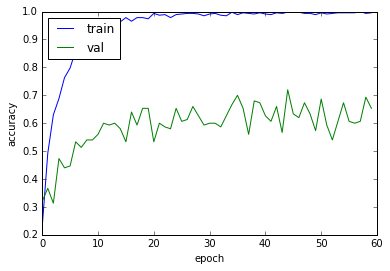

In [7]:
plt.plot(train_acc_history)
plt.plot(val_acc_history)
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [8]:
print "best validation accuracy after training for 60 epochs: ",  max(val_acc_history)

best validation accuracy after training for 60 epochs:  0.72


In [9]:
y_test_pred = predict_fn(X_test)

In [10]:
print np.mean(y_test==y_test_pred)

0.8125
